# Recommendation based on collaboration Office category

## Project Overview:
The project focuses on building a recommender system that suggests products to users based on their past ratings and preferences. It employs two main approaches: memory-based collaborative filtering and model-based collaborative filtering.

### Data Loading and Preprocessing:

- Load the dataset containing user ratings for products (presumably from an e-commerce platform).
- Select relevant columns such as reviewerID, asin (product ID), and overall (rating).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df= pd.read_csv('t1.csv')
df.head()

,Unnamed: 0,category,description,title,brand,date,price,asin,imageURL,overall,verified,reviewTime,reviewText,reviewerID,Sentimental
0,0,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],3,False,"11 3, 2006","I thought the book was entertaining and cute, ...",A2WJLOXXIB7NF3,Neutral
1,1,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"05 9, 2006",This adorable story is an all time favorite fa...,A1RKICUK0GG6VF,Positive
2,2,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"03 11, 2006",Lisa's bear Corduroy gets lost in the laundrom...,A1QA5E50M398VW,Positive
3,3,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"01 24, 2001",In this installment of Corduroy's adventures w...,A3N0HBW8IP8CZQ,Positive
4,4,"['Office Products', 'Office & School Supplies'...",['Corduroy the bear goes to the launderette wi...,A Pocket for Corduroy,Ingram Book & Distributor,2006-09-14,0.95,0140503528,[],5,False,"07 30, 2000",Researchers constantly find that reading to ch...,A1K1JW1C5CUSUZ,Positive


In [3]:
df1=df[['reviewerID','asin','overall']][:12000]
df1.head()

,reviewerID,asin,overall
0,A2WJLOXXIB7NF3,0140503528,3
1,A1RKICUK0GG6VF,0140503528,5
2,A1QA5E50M398VW,0140503528,5
3,A3N0HBW8IP8CZQ,0140503528,5
4,A1K1JW1C5CUSUZ,0140503528,5


### Data Exploration:

- Explore basic statistics and visualizations to understand the distribution of ratings and user behavior.

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewerID  12000 non-null  object
 1   asin        12000 non-null  object
 2   overall     12000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 281.4+ KB


In [5]:
df1.describe()

,overall
count,12000.000000
mean,4.502750
std,1.016241
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df1.isnull().sum()

reviewerID    0
asin          0
overall       0
dtype: int64

In [7]:
df1.shape

(12000, 3)

In [8]:
df1.drop_duplicates(inplace=True)

In [9]:
df1.shape

(11958, 3)

C:\Users\prabh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='overall', ylabel='count'>

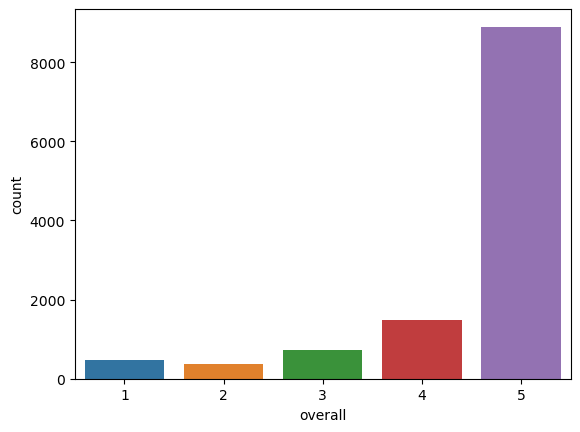

In [10]:
sb.countplot(df1['overall'])

In [11]:
print("total rating =",len(df1['overall']))
print("Total unique users = ",df1['reviewerID'].nunique())
print("Total unique Products = ",df1['asin'].nunique())

total rating = 11958
Total unique users =  11667
Total unique Products =  287


## Memory-Based Collaborative Filtering:

- Calculate the number of rated products per user to understand user engagement.
- Compute the average rating for each product to identify popular products.
- Visualize the distribution of average ratings for products.
- Utilize the Surprise library to implement KNN-based collaborative filtering.
- Train the model using the training set and evaluate its performance using the test set.
- Print the Root Mean Squared Error (RMSE) as a measure of model accuracy.

Analyzing the rating by user

In [12]:
no_of_rated_product_per_user = df1.groupby(by='reviewerID')['overall'].count().sort_values(ascending=False)
no_of_rated_product_per_user.head()

reviewerID
A2OMDCK5PYHTXO    4
A1U68LJSSK8H98    3
AMGGNP5A71PP2     3
A2RLX5MG9VCAN1    3
A3OU08KASX7OCC    3
Name: overall, dtype: int64

<AxesSubplot:xlabel='reviewerID'>

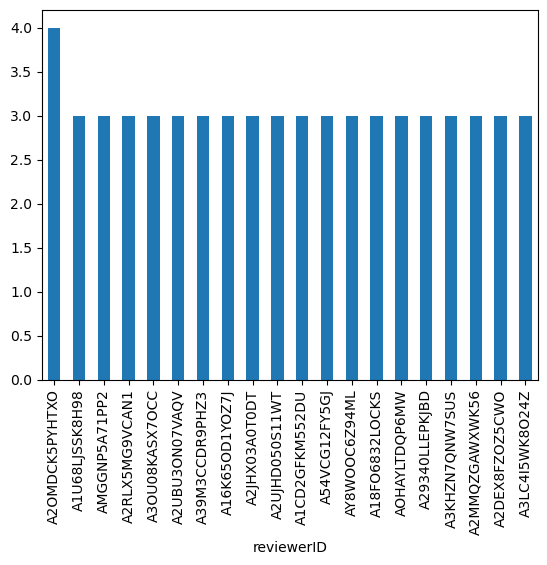

In [13]:
no_of_rated_product_per_user.head(20).plot(kind='bar')

# Average Rating Product

In [14]:
mean_rating_prodcut_count = pd.DataFrame(df1.groupby('asin')['overall'].mean())

In [15]:
mean_rating_prodcut_count.head()

,overall
asin,
0140503528,4.573913
0245109919,5.000000
0439394058,4.153846
043949950X,5.000000
0439537886,4.458333


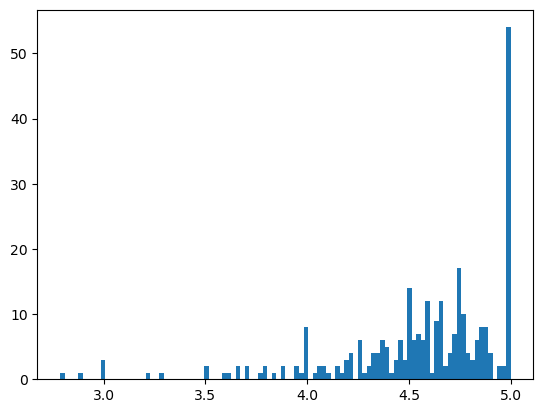

In [16]:
# plot the rating distribution of average rating product
plt.hist(mean_rating_prodcut_count['overall'],bins=100);

In [17]:
mean_rating_prodcut_count['overall'].skew()

-1.5696703119010356

In [18]:
#conda install -c conda-forge scikit-surprise 

In [19]:
#import surprise libraru for collabrative filtering
#!pip install scikit-surprise

In [22]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [23]:
reader = Reader(rating_scale=(1,5))
surprise_data = Dataset.load_from_df(df1,reader)

In [24]:
#splitting surprise the dataset into 80:20
train,test= train_test_split(surprise_data,test_size=0.3,random_state=47)

In [25]:
algo = KNNWithMeans(k=5,sim_options={'name':'pearson_baseline','used_based':False})
algo.fit(train)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [26]:
#make prediction using test
test_pred = algo.test(test)

In [27]:
#print RMSE
print("Item-Based Model : Test set")
accuracy.rmse(test_pred,verbose=True)

Item-Based Model : Test set
RMSE: 1.0310


1.0310240525854146

# Model Based collabrative filtering system
- Create a user-item matrix where rows represent users, columns represent products, and cells contain ratings.
- Transpose the matrix to get an item-user matrix.
- Decompose the item-user matrix using Singular Value Decomposition (SVD) to capture latent factors.
- Compute the correlation matrix between products based on decomposed features.
- Recommend top correlated products for a given product based on correlation threshold.
- Merge recommended products with the original dataset to retrieve additional information such as product titles and ratings.

In [28]:
df1.shape

(11958, 3)

In [29]:
rating_matrix = df1.pivot_table(values='overall',index='reviewerID',columns='asin',fill_value=0)
rating_matrix.head()

asin,0140503528,0245109919,0439394058,043949950X,0439537886,0439654939,0439731593,0439731771,0439784395,0439893577,...,1604189541,1604189568,1605160091,1605160210,160516156X,1605161594,1605161713,1605162957,160817641X,1608176428
reviewerID,,,,,,,,,,,,,,,,,,,,,
A0440970QIFGYIPSB9LS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0776669NZZD6IZI2J5P,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100K2WJXXOBXC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A100LYLLJ4GPPM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,0,0
A101ZOK2TBMRRO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


above we have created a pivot table of the rating where the value of the column will overall(rating) and index will be userid and the column name will be asin(product id)

In [30]:
rating_matrix.shape

(11667, 287)

In [31]:
# transpose
x_rating_matrix = rating_matrix.T
x_rating_matrix.head()

reviewerID,A0440970QIFGYIPSB9LS,A0776669NZZD6IZI2J5P,A100K2WJXXOBXC,A100LYLLJ4GPPM,A101ZOK2TBMRRO,A102G2EEYYFSR8,A10313KPNBUF6N,A1040IWUDHDH68,A1043K299ZPBF3,A104BYW1P6Q0U0,...,AZW2CVCM2V4EK,AZXC0JHMZMSYA,AZXGFH8WHIKDV,AZXS8AO1H2JBI,AZXVVYQVDJSM0,AZY0XLDB3N5AU,AZY609AUO78IN,AZY6MR9GIMQ4Y,AZZHMMFW41DFI,AZZKYP9254H32
asin,,,,,,,,,,,,,,,,,,,,,
0140503528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0245109919,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0439394058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
043949950X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0439537886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
x_rating_matrix.shape

(287, 11667)

In [33]:
# Decomposition of the matrix
from sklearn.decomposition import TruncatedSVD

In [34]:
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(x_rating_matrix)
decomposed_matrix.shape

(287, 10)

In [35]:
#corelation matrix
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(287, 287)

In [36]:
x_rating_matrix.index[10]

'0439899095'

In [37]:
i="0439899095"
product_name = list(x_rating_matrix.index)
product_id = product_name.index(i)
print(product_id)

10


In [38]:
correlation_product_id = correlation_matrix[product_id]
correlation_product_id.shape

(287,)

In [39]:
correlation_matrix[correlation_product_id>0.85].shape

(3, 287)

In [40]:
#reccomending top 20 highly correlated products in sequence
recommend = list(x_rating_matrix.index[correlation_product_id > 0.95])
recco=recommend[:20]

In [41]:
rec=pd.DataFrame(recco,columns=['asin'])

In [42]:
final=pd.merge(df,rec,on='asin',how='inner')

In [43]:
final[['title','asin','overall']]

,title,asin,overall
0,Differentiated Literacy Centers: 85 + Leveled ...,0439899095,3
1,Differentiated Literacy Centers: 85 + Leveled ...,0439899095,4
2,Differentiated Literacy Centers: 85 + Leveled ...,0439899095,3
3,Differentiated Literacy Centers: 85 + Leveled ...,0439899095,5
4,Differentiated Literacy Centers: 85 + Leveled ...,0439899095,5


## Final Output:

Display the top recommended products along with their titles and ratings to the user.

In [44]:
unique_values=final['title'].unique()

array(['Differentiated Literacy Centers: 85 + Leveled Activities-With Reproducible Planning Sheets and Student Pages-to Support Centers in Fluency, Reading Comprehension, and Word Study'],
      dtype=object)

In [47]:
unique_values

array(['Differentiated Literacy Centers: 85 + Leveled Activities-With Reproducible Planning Sheets and Student Pages-to Support Centers in Fluency, Reading Comprehension, and Word Study'],
      dtype=object)

**These are the recommended product using collabration method**

## Conclusion:
This project aims to provide personalized product recommendations to users by leveraging collaborative filtering techniques. It utilizes both memory-based and model-based approaches to analyze user-item interactions and identify patterns in the data. The final output is a list of recommended products tailored to each user's preferences, thereby enhancing their shopping experience and increasing user engagement.